In [62]:
#import dependencies
import pandas as pd 
import scipy as scipy
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
rockford_data = pd.read_csv('Resources/Cleaned_Rockford.csv')
rockford_data.head()

,Unnamed: 0,X,Y,Occurred Date,Description,year
0,0,-89.124354,42.284104,20160125,90C - Disorderly Conduct,2016
1,1,-89.070417,42.254735,20160205,90C - Disorderly Conduct,2016
2,2,-89.042083,42.238147,20160209,13B - Simple Assault,2016
3,3,-89.029085,42.241433,20160210,290 - Destruction/Damage/Vandalism of Property,2016
4,4,-89.029201,42.211097,20160206,23H - All Other Larceny,2016


In [3]:
trimmed_rockford = rockford_data.dropna()
len(trimmed_rockford)

194128

In [4]:
rockford_data.sort_values(by=["year"], inplace = True)
rockford_data

,Unnamed: 0,X,Y,Occurred Date,Description,year
17069,17069,-89.071063,42.225996,20110404,290 - Destruction/Damage/Vandalism of Property,2011
15726,15726,-88.982039,42.272071,20110430,290 - Destruction/Damage/Vandalism of Property,2011
15725,15725,-88.995567,42.298990,20110430,13B - Simple Assault,2011
15724,15724,-89.103151,42.294966,20110430,35B - Drug Equipment Violations,2011
15723,15723,-89.103151,42.294966,20110430,35A - Drug/narcotic Violations,2011
...,...,...,...,...,...,...
190883,190883,-89.106702,42.281239,20200211,13A - Aggravated Assault,2020
190882,190882,-89.106702,42.281239,20200211,90J - Trespass of Real Property,2020
190881,190881,-89.095103,42.271073,20200211,90J - Trespass of Real Property,2020
190887,190887,-89.092193,42.230485,20200213,90C - Disorderly Conduct,2020


In [5]:
cleaned_rockford = rockford_data[['Description', 'year', 'Occurred Date', 'X', 'Y']]
cleaned_rockford.head()

,Description,year,Occurred Date,X,Y
17069,290 - Destruction/Damage/Vandalism of Property,2011,20110404,-89.071063,42.225996
15726,290 - Destruction/Damage/Vandalism of Property,2011,20110430,-88.982039,42.272071
15725,13B - Simple Assault,2011,20110430,-88.995567,42.298990
15724,35B - Drug Equipment Violations,2011,20110430,-89.103151,42.294966
15723,35A - Drug/narcotic Violations,2011,20110430,-89.103151,42.294966


In [6]:
cleaned_rockford.replace("Description", "Crime")

,Description,year,Occurred Date,X,Y
17069,290 - Destruction/Damage/Vandalism of Property,2011,20110404,-89.071063,42.225996
15726,290 - Destruction/Damage/Vandalism of Property,2011,20110430,-88.982039,42.272071
15725,13B - Simple Assault,2011,20110430,-88.995567,42.298990
15724,35B - Drug Equipment Violations,2011,20110430,-89.103151,42.294966
15723,35A - Drug/narcotic Violations,2011,20110430,-89.103151,42.294966
...,...,...,...,...,...
190883,13A - Aggravated Assault,2020,20200211,-89.106702,42.281239
190882,90J - Trespass of Real Property,2020,20200211,-89.106702,42.281239
190881,90J - Trespass of Real Property,2020,20200211,-89.095103,42.271073
190887,90C - Disorderly Conduct,2020,20200213,-89.092193,42.230485


In [7]:

for index, row in cleaned_rockford.iterrows():
    cleaned_rockford['Description'][index] = cleaned_rockford['Description'][index].split('- ')[1]

cleaned_rockford.head()


<ipython-input-7-8c8e6d37239b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_rockford['Description'][index] = cleaned_rockford['Description'][index].split('- ')[1]
C:\Users\wuebb\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Description,year,Occurred Date,X,Y
17069,Destruction/Damage/Vandalism of Property,2011,20110404,-89.071063,42.225996
15726,Destruction/Damage/Vandalism of Property,2011,20110430,-88.982039,42.272071
15725,Simple Assault,2011,20110430,-88.995567,42.298990
15724,Drug Equipment Violations,2011,20110430,-89.103151,42.294966
15723,Drug/narcotic Violations,2011,20110430,-89.103151,42.294966


In [8]:
cleaned_rockford['Description'].unique()

array(['Destruction/Damage/Vandalism of Property', 'Simple Assault',
       'Drug Equipment Violations', 'Drug/narcotic Violations',
       'Disorderly Conduct', 'Aggravated Assault', 'All Other Larceny',
       'Burglary/Breaking & Entering', 'Theft From Motor Vehicle',
       'Robbery', 'Weapon Law Violations',
       'Credit Card/Automatic Teller Fraud', 'Motor Vehicle Theft',
       'Liquor Law Violations', 'Trespass of Real Property',
       'Curfew/Loitering/Vagrancy Violations',
       'Theft of Motor Vehicle Parts/Accessories', 'Shoplifting',
       'Intimidation', 'Impersonation',
       'False Pretenses/Swindle/Confidence Game',
       'Assisting or Promoting Prostitution',
       'Driving Under the Influence', 'Counterfeiting/Forgery',
       'Stolen Property Offenses', 'Arson',
       'Theft From Coin Operated Machine or Device', 'Purse-Snatching',
       'Pornography/Obscene Material', 'Wire Fraud', 'Pocket-Picking',
       'Prostitution', 'Peeping', 'Extortion/Blackmail',

In [71]:

filtered_cleaned_rockford = cleaned_rockford['Description'].replace('Destruction/Damage/Vandalism of Property', 'CRIMINAL DAMAGE').replace('All Other Larceny', 'LARCENY').replace('Disorderly Conduct', 'DISORDERLY CONDUCT').replace('Curfew/Loitering/Vagrancy Violations', 'OTHER').replace('Embezzlement', 'OTHER').replace('Extortion/Blackmail', 'OTHER').replace('Weapon Law Violations', 'WEAPONS VIOLATIONS').replace('Motor Vehicle Theft', 'MOTOR VEHICLE THEFT').replace('Arson', 'ARSON').replace('Peeping', 'OTHER').replace('Intimidation', 'ASSAULT').replace('Wire Fraud', 'FRAUD').replace('Liquor Law Violations', 'LIQOUR VIOLATIONS').replace('Driving Under the Influence', 'LIQOUR VIOLATIONS').replace('Impersonation', 'FRAUD').replace('False Pretenses/Swindle/Confidence Game', 'FRAUD').replace('Credit Card/Automatic Teller Fraud', 'FRAUD').replace('Counterfeiting/Forgery', 'FRAUD').replace('Assisting or Promoting Prostitution', 'SEX OFFENSE').replace('Pornography/Obscene Material', 'SEX OFFENSE').replace('Prostitution', 'SEX OFFENSE').replace('Theft From Building', 'THEFT').replace('Purse-Snatching', 'THEFT').replace('Negligent Manslaughter', 'HOMICIDE').replace('Justifiable Homicide', 'HOMICIDE').replace('Drug Equipment Violations', 'NARCOTICS').replace('Drug/narcotic Violations', 'NARCOTICS').replace('Murder and Nonnegligent Manslaughter', 'HOMICIDE').replace('Trespass of Real Property', 'TRESPASS').replace('Theft of Motor Vehicle Parts/Accessories', 'Theft').replace('Simple Assault','ASSAULT').replace('Aggravated Assault','CRIMINAL ASSAULT').replace('Pocket-Picking','THEFT').replace('Stolen Property Offenses','THEFT').replace('Shoplifting','THEFT').replace('Theft','THEFT').replace('Burglary/Breaking & Entering','THEFT').replace('Theft From Motor Vehicle', 'THEFT').replace('Theft From Coin Operated Machine or Device', 'THEFT').replace('Robbery', 'ROBBERY')
rf_crime_types = filtered_cleaned_rockford.value_counts()

In [80]:
rf_crime_df = pd.DataFrame({
    'Total': rf_crime_types,
    'Crime': filtered_cleaned_rockford
})
rf_crime_df


,Total,Crime
0,NaN,DISORDERLY CONDUCT
1,NaN,DISORDERLY CONDUCT
2,NaN,ASSAULT
3,NaN,CRIMINAL DAMAGE
4,NaN,LARCENY
...,...,...
ROBBERY,3913.0,NaN
SEX OFFENSE,634.0,NaN
THEFT,33429.0,NaN
TRESPASS,8082.0,NaN


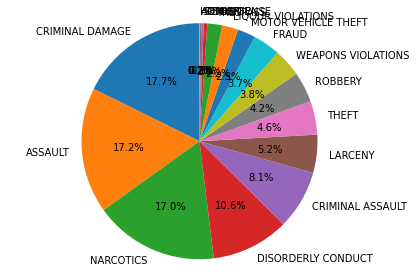

In [72]:
plt.pie(
    # using data total)arrests
    rf_crime_df['Total'],
    # with the labels being officer names
    labels=rf_crime_df['Crime'],
    # with no shadows
    shadow=False,
    # with colors
    # with one slide exploded out
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')


# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
